# Installments Payments Dataset Analysis

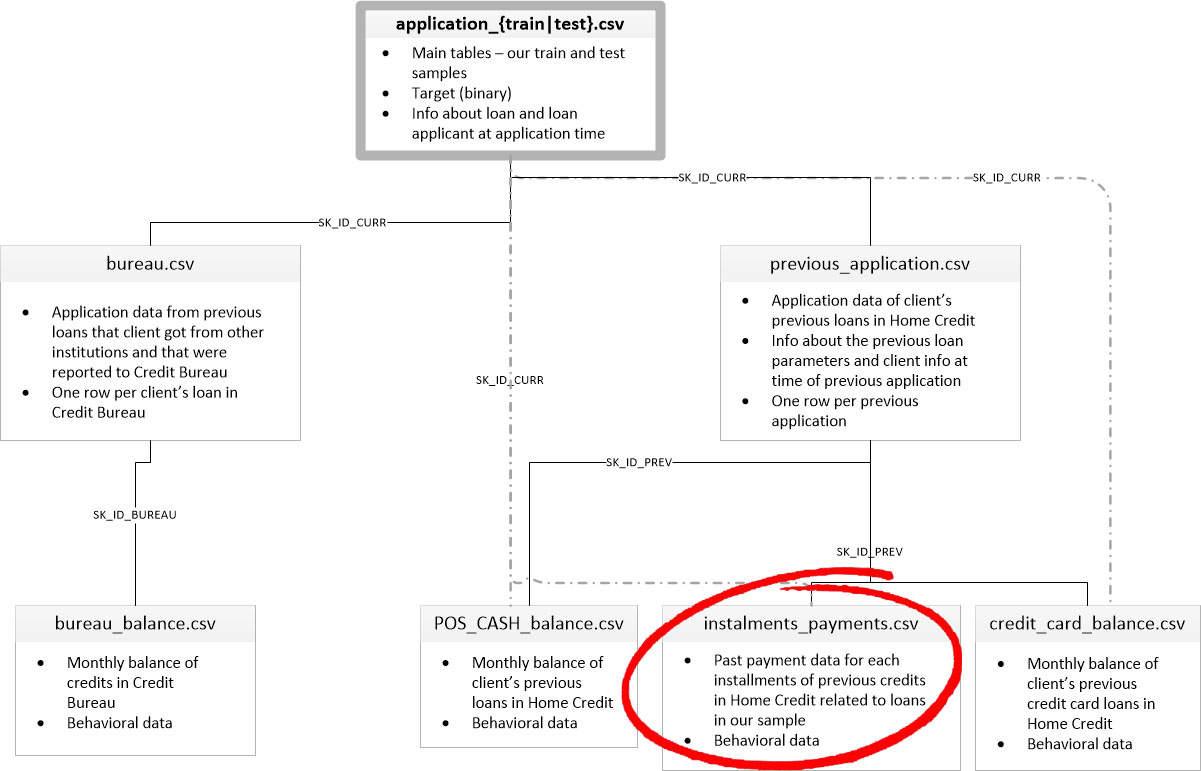

In this notebook I will try to explore instalments_payments dataset and see what we can take from it.

Here is a short description from home credit about this dataset:
* "Repayment history for the previously disbursed credits in Home Credit related to the loans in our sample."
* "There is a) one row for every payment that was made plus b) one row each for missed payment."
* "One row is equivalent to one payment of one installment OR one installment corresponding to one payment of one previous Home Credit credit related to loans in our sample."

# Import Libraries

In [1]:
%load_ext nb_black
import homecredit_functions as hc
import imp

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid", color_codes=True)
pd.set_option("display.float_format", lambda x: "%.5f" % x)

import warnings

warnings.filterwarnings("ignore")

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

RANDOM_STATE = 0

<IPython.core.display.Javascript object>

# Load Processed Application Datasets

### Application Test Processed Dataset

In [2]:
path_application_test_proc = "data/application_test_proc.csv"
df_application_test_proc = pd.read_csv(path_application_test_proc)

<IPython.core.display.Javascript object>

In [3]:
df_application_test_proc.head(5)

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,...,EXT_SOURCE_MIN,ANNUITY_CREDIT_RATIO,CREDIT_ANNUITY_RATIO,TARGET_NEIGHBORS_500_MEAN,GOODS_PRICE_AMT_ANNUITY_RATIO,GOODS_PRICE_AMT_INCOME_TOTAL_RATIO,GOODS_PRICE_AMT_CREDIT_RATIO,ANNUITY_DAYS_EMPLOYED_RATIO,ANNUITY_DAYS_BIRTH_RATIO,SK_ID_CURR
0,0.00000,0.00093,0.13079,0.25700,0.33754,0.04067,0.79045,0.88718,1.00000,1.00000,...,0.18150,0.13697,0.40086,0.11915,0.14272,0.03929,0.09607,0.99961,0.95603,100001
1,0.00000,0.00063,0.04439,0.49159,0.40389,0.03509,0.63043,0.77449,1.00000,1.00000,...,0.33184,0.43293,0.12210,0.25106,0.05407,0.02141,0.09867,0.99981,0.96073,100005
2,0.00000,0.00151,0.15437,0.26048,0.29262,0.03511,0.91184,0.51327,1.00000,1.00000,...,0.69517,0.62560,0.05975,0.03404,0.04381,0.03667,0.12049,0.99933,0.84987,100013
3,0.10526,0.00247,0.38202,0.36143,0.63433,0.04188,0.91894,0.41531,1.00000,1.00000,...,0.57990,0.10142,0.48475,0.05532,0.22152,0.05896,0.12821,0.99889,0.84877,100028
4,0.05263,0.00132,0.14494,0.13490,0.68709,0.04103,0.83787,0.40781,1.00000,1.00000,...,0.23000,0.24395,0.24761,0.23404,0.12441,0.04097,0.12821,0.99937,0.89487,100038


<IPython.core.display.Javascript object>

### Application Train Processed Dataset

In [4]:
path_application_train_proc = "data/application_train_proc.csv"
df_application_train_proc = pd.read_csv(path_application_train_proc)

<IPython.core.display.Javascript object>

In [5]:
df_application_train_proc.head(5)

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,...,ANNUITY_CREDIT_RATIO,CREDIT_ANNUITY_RATIO,TARGET_NEIGHBORS_500_MEAN,GOODS_PRICE_AMT_ANNUITY_RATIO,GOODS_PRICE_AMT_INCOME_TOTAL_RATIO,GOODS_PRICE_AMT_CREDIT_RATIO,ANNUITY_DAYS_EMPLOYED_RATIO,ANNUITY_DAYS_BIRTH_RATIO,TARGET,SK_ID_CURR
0,0.00000,0.00151,0.09029,0.25632,0.88884,0.04509,0.85214,0.70543,1.00000,1.00000,...,0.31105,0.19041,0.54468,0.08367,0.02041,0.10717,0.99838,0.88820,1,100002
1,0.00000,0.00209,0.31174,0.04502,0.47711,0.04365,0.95193,0.95957,1.00000,1.00000,...,0.07648,0.56183,0.08511,0.21774,0.04932,0.10870,0.99874,0.90937,0,100003
2,0.00000,0.00036,0.02247,0.13490,0.34853,0.04616,0.82733,0.64833,1.00000,1.00000,...,0.23499,0.25688,0.05532,0.12821,0.02356,0.12821,0.99874,0.98744,0,100004
3,0.00000,0.00093,0.06684,0.10702,0.35085,0.03882,0.60145,0.66139,1.00000,1.00000,...,0.55299,0.07905,0.06809,0.05132,0.02592,0.12049,0.99957,0.93432,0,100006
4,0.00000,0.00082,0.11685,0.39288,0.29859,0.03882,0.82527,0.51952,1.00000,1.00000,...,0.18279,0.32191,0.15319,0.15483,0.04978,0.12821,0.99968,0.95478,0,100007


<IPython.core.display.Javascript object>

# EDA

## Instalments Payments Dataset

In [6]:
path_inst_payment = "data/installments_payments.csv"
df_inst_payment = pd.read_csv(path_inst_payment)

<IPython.core.display.Javascript object>

In [7]:
df_inst_payment.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.00000,6,-1180.00000,-1187.00000,6948.36000,6948.36000
1,1330831,151639,0.00000,34,-2156.00000,-2156.00000,1716.52500,1716.52500
2,2085231,193053,2.00000,1,-63.00000,-63.00000,25425.00000,25425.00000
3,2452527,199697,1.00000,3,-2418.00000,-2426.00000,24350.13000,24350.13000
4,2714724,167756,1.00000,2,-1383.00000,-1366.00000,2165.04000,2160.58500


<IPython.core.display.Javascript object>

In [8]:
df_inst_payment.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_PREV,13605401.00000,1903364.96955,536202.90555,1000001.00000,1434191.00000,1896520.00000,2369094.00000,2843499.00000
SK_ID_CURR,13605401.00000,278444.88174,102718.31041,100001.00000,189639.00000,278685.00000,367530.00000,456255.00000
NUM_INSTALMENT_VERSION,13605401.00000,0.85664,1.03522,0.00000,0.00000,1.00000,1.00000,178.00000
NUM_INSTALMENT_NUMBER,13605401.00000,18.87090,26.66407,1.00000,4.00000,8.00000,19.00000,277.00000
DAYS_INSTALMENT,13605401.00000,-1042.26999,800.94628,-2922.00000,-1654.00000,-818.00000,-361.00000,-1.00000
DAYS_ENTRY_PAYMENT,13602496.00000,-1051.11368,800.58588,-4921.00000,-1662.00000,-827.00000,-370.00000,-1.00000
AMT_INSTALMENT,13605401.00000,17050.90699,50570.25443,0.00000,4226.08500,8884.08000,16710.21000,3771487.84500
AMT_PAYMENT,13602496.00000,17238.22325,54735.78398,0.00000,3398.26500,8125.51500,16108.42500,3771487.84500


<IPython.core.display.Javascript object>

**Observation:**:
* Dataset has only numerical features.
* NUM_INSTALMENT_VERSION and NUM_INSTALMENT_NUMBER has extreme max values comparing to their mean and standard deviation values. 

In [9]:
# Merge POS_CASH_balance dataset with application train dataset
df_inst_payment_analysis = df_inst_payment.copy()
df_inst_payment_analysis = df_inst_payment_analysis.merge(
    df_application_train_proc[["SK_ID_CURR", "TARGET"]], how="left", on="SK_ID_CURR"
)
df_inst_payment_analysis.head(5)

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,TARGET
0,1054186,161674,1.00000,6,-1180.00000,-1187.00000,6948.36000,6948.36000,0.00000
1,1330831,151639,0.00000,34,-2156.00000,-2156.00000,1716.52500,1716.52500,0.00000
2,2085231,193053,2.00000,1,-63.00000,-63.00000,25425.00000,25425.00000,0.00000
3,2452527,199697,1.00000,3,-2418.00000,-2426.00000,24350.13000,24350.13000,0.00000
4,2714724,167756,1.00000,2,-1383.00000,-1366.00000,2165.04000,2160.58500,0.00000


<IPython.core.display.Javascript object>

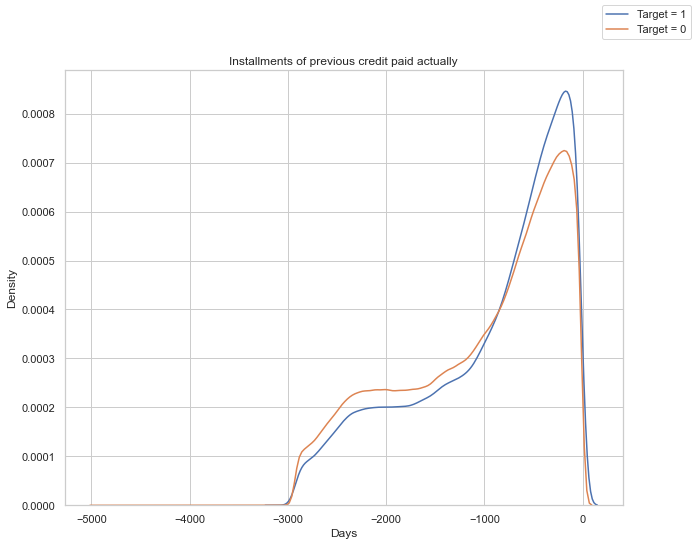

<IPython.core.display.Javascript object>

In [10]:
fig = plt.figure(figsize=(10, 8))
plt.title("Installments of previous credit paid actually")
plt.xlabel("Days")
sns.kdeplot(
    df_inst_payment_analysis[df_inst_payment_analysis["TARGET"] == 1][
        "DAYS_ENTRY_PAYMENT"
    ]
)
sns.kdeplot(
    df_inst_payment_analysis[df_inst_payment_analysis["TARGET"] == 0][
        "DAYS_ENTRY_PAYMENT"
    ]
)
fig.legend(labels=["Target = 1", "Target = 0"])
plt.show()

**Observation:**:
* There is no significant difference between defaulters and people who paid their credit regarding when was the installments of previous credit paid actually.We can note that defaulters paid very slightly quicker. Interestingly reaching 3000 days curves drops at steep angle.

# Data Wrangling

## Correlation

### Correlation with target

In [11]:
corrs_inst_payment = df_inst_payment_analysis.corr()[["TARGET"]].sort_values(
    by="TARGET", ascending=False
)
corrs_inst_payment = corrs_inst_payment.rename(columns={"TARGET": "target_corr"})
corrs_inst_payment = corrs_inst_payment.drop(["TARGET", "SK_ID_CURR", "SK_ID_PREV"])
corrs_inst_payment

,target_corr
DAYS_ENTRY_PAYMENT,0.03512
DAYS_INSTALMENT,0.03497
AMT_INSTALMENT,-0.00150
AMT_PAYMENT,-0.00362
NUM_INSTALMENT_VERSION,-0.00990
NUM_INSTALMENT_NUMBER,-0.01619


<IPython.core.display.Javascript object>

As we can see there is not a lot of correlation going between our numerical features and target.

# Installment Payments Split Train/Test

In [11]:
%%time
df_inst_payment_agg = hc.aggregate_samples(df_inst_payment.drop(columns=["SK_ID_PREV"]),"INST_")

Wall time: 32.5 s


<IPython.core.display.Javascript object>

In [14]:
df_inst_payment_agg.head(5)

,SK_ID_CURR,INST_NUM_INSTALMENT_VERSION_MEAN,INST_NUM_INSTALMENT_NUMBER_MEAN,INST_DAYS_INSTALMENT_MEAN,INST_DAYS_ENTRY_PAYMENT_MEAN,INST_AMT_INSTALMENT_MEAN,INST_AMT_PAYMENT_MEAN,INST_NUM_INSTALMENT_VERSION_MAX,INST_NUM_INSTALMENT_NUMBER_MAX,INST_DAYS_INSTALMENT_MAX,...,INST_DAYS_INSTALMENT_MIN,INST_DAYS_ENTRY_PAYMENT_MIN,INST_AMT_INSTALMENT_MIN,INST_AMT_PAYMENT_MIN,INST_NUM_INSTALMENT_VERSION_SUM,INST_NUM_INSTALMENT_NUMBER_SUM,INST_DAYS_INSTALMENT_SUM,INST_DAYS_ENTRY_PAYMENT_SUM,INST_AMT_INSTALMENT_SUM,INST_AMT_PAYMENT_SUM
0,100001,1.14286,2.71429,-2187.71429,-2195.00000,5885.13214,5885.13214,2.00000,4,-1619.00000,...,-2916.00000,-2916.00000,3951.00000,3951.00000,8.00000,19,-15314.00000,-15365.00000,41195.92500,41195.92500
1,100002,1.05263,10.00000,-295.00000,-315.42105,11559.24711,11559.24711,2.00000,19,-25.00000,...,-565.00000,-587.00000,9251.77500,9251.77500,20.00000,190,-5605.00000,-5993.00000,219625.69500,219625.69500
2,100003,1.04000,5.08000,-1378.16000,-1385.32000,64754.58600,64754.58600,2.00000,12,-536.00000,...,-2310.00000,-2324.00000,6662.97000,6662.97000,26.00000,127,-34454.00000,-34633.00000,1618864.65000,1618864.65000
3,100004,1.33333,2.00000,-754.00000,-761.66667,7096.15500,7096.15500,2.00000,3,-724.00000,...,-784.00000,-795.00000,5357.25000,5357.25000,4.00000,6,-2262.00000,-2285.00000,21288.46500,21288.46500
4,100005,1.11111,5.00000,-586.00000,-609.55556,6240.20500,6240.20500,2.00000,9,-466.00000,...,-706.00000,-736.00000,4813.20000,4813.20000,10.00000,45,-5274.00000,-5486.00000,56161.84500,56161.84500


<IPython.core.display.Javascript object>

In [13]:
%%time
# Splitting into train/test sets
df_train_sliced = df_application_train_proc[["SK_ID_CURR", "TARGET"]]
df_test_sliced = df_application_test_proc[["SK_ID_CURR"]]

df_inst_payment_train = df_train_sliced.merge(df_inst_payment_agg,how='left', on='SK_ID_CURR')
df_inst_payment_test = df_test_sliced.merge(df_inst_payment_agg,how='left', on='SK_ID_CURR')

Wall time: 805 ms


<IPython.core.display.Javascript object>

## Missing Values

In [14]:
missing_values_train = hc.missing_values(df_inst_payment_train)
missing_values_train

,Missing Values,% of Total Values
INST_DAYS_ENTRY_PAYMENT_MEAN,15876,5.20000
INST_AMT_PAYMENT_MEAN,15876,5.20000
INST_DAYS_ENTRY_PAYMENT_MAX,15876,5.20000
INST_AMT_PAYMENT_MIN,15876,5.20000
INST_AMT_PAYMENT_MAX,15876,5.20000
INST_DAYS_ENTRY_PAYMENT_MIN,15876,5.20000
INST_NUM_INSTALMENT_VERSION_MEAN,15868,5.20000
INST_DAYS_INSTALMENT_MIN,15868,5.20000
INST_AMT_INSTALMENT_SUM,15868,5.20000
INST_DAYS_ENTRY_PAYMENT_SUM,15868,5.20000


<IPython.core.display.Javascript object>

## Impute Missing Values

In [15]:
df_inst_payment_train_imp, df_inst_payment_test_imp = hc.impute_missing_num(
    df_inst_payment_train, df_inst_payment_test, df_inst_payment_test.columns
)

<IPython.core.display.Javascript object>

In [17]:
hc.missing_values(df_inst_payment_train_imp)

,Missing Values,% of Total Values


<IPython.core.display.Javascript object>

In [18]:
hc.missing_values(df_inst_payment_test_imp)

,Missing Values,% of Total Values


<IPython.core.display.Javascript object>

# Scale

In [19]:
df_train_full_scaled, df_test_full_scaled = hc.scale_minmax(
    df_inst_payment_train_imp, df_inst_payment_test_imp
)

<IPython.core.display.Javascript object>

In [20]:
df_train_full_scaled.head(5)

,INST_NUM_INSTALMENT_VERSION_MEAN,INST_NUM_INSTALMENT_NUMBER_MEAN,INST_DAYS_INSTALMENT_MEAN,INST_DAYS_ENTRY_PAYMENT_MEAN,INST_AMT_INSTALMENT_MEAN,INST_AMT_PAYMENT_MEAN,INST_NUM_INSTALMENT_VERSION_MAX,INST_NUM_INSTALMENT_NUMBER_MAX,INST_DAYS_INSTALMENT_MAX,INST_DAYS_ENTRY_PAYMENT_MAX,...,INST_AMT_INSTALMENT_MIN,INST_AMT_PAYMENT_MIN,INST_NUM_INSTALMENT_VERSION_SUM,INST_NUM_INSTALMENT_NUMBER_SUM,INST_DAYS_INSTALMENT_SUM,INST_DAYS_ENTRY_PAYMENT_SUM,INST_AMT_INSTALMENT_SUM,INST_AMT_PAYMENT_SUM,TARGET,SK_ID_CURR
0,0.02699,0.06564,0.89997,0.89817,0.00462,0.00462,0.01124,0.06522,0.99178,0.98436,...,0.00369,0.00369,0.01409,0.00430,0.99065,0.99005,0.00944,0.00860,1,100002.00000
1,0.02667,0.02976,0.52889,0.54944,0.02585,0.02585,0.01124,0.03986,0.81684,0.82313,...,0.00266,0.00266,0.01832,0.00287,0.94248,0.94252,0.06955,0.06339,0,100003.00000
2,0.03419,0.00729,0.74272,0.75272,0.00283,0.00283,0.01124,0.00725,0.75248,0.76352,...,0.00214,0.00214,0.00282,0.00011,0.99623,0.99621,0.00091,0.00083,0,100004.00000
3,0.02885,0.02507,0.91461,0.91244,0.02513,0.02513,0.01124,0.03261,0.99658,0.99642,...,0.00099,0.00099,0.01268,0.00159,0.99327,0.99279,0.04327,0.03944,0,100006.00000
4,0.02991,0.04409,0.64864,0.66452,0.00506,0.00488,0.01124,0.05797,0.99555,0.99577,...,0.00073,0.00000,0.05426,0.01057,0.88666,0.88692,0.03592,0.03157,0,100007.00000


<IPython.core.display.Javascript object>

# Baseline model

In [21]:
X_train_full = df_train_full_scaled.drop(columns=["TARGET", "SK_ID_CURR"])
X_test_full = df_test_full_scaled.drop(columns=["SK_ID_CURR"])

y_train_full = df_train_full_scaled["TARGET"]

<IPython.core.display.Javascript object>

In [22]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full,
    y_train_full,
    test_size=0.2,
    stratify=y_train_full,
    random_state=RANDOM_STATE,
)

<IPython.core.display.Javascript object>

### LGBM

In [23]:
LGBM_clsf = LGBMClassifier(
    class_weight="balanced", random_state=RANDOM_STATE, n_jobs=-1, metric="auc"
)

<IPython.core.display.Javascript object>

In [24]:
%%time
LGBM_clsf.fit(X_train, y_train)

Wall time: 3.36 s


LGBMClassifier(class_weight='balanced', metric='auc', random_state=0)

<IPython.core.display.Javascript object>

In [25]:
y_pred_train, y_pred_val = hc.get_binary_predictions(LGBM_clsf, X_train, X_val)
y_pred_train_prob, y_pred_val_prob = hc.get_prob_predictions(LGBM_clsf, X_train, X_val)

accuracy_score_train, accuracy_score_val = hc.get_accuracy_scores(
    y_train, y_pred_train, y_val, y_pred_val
)
precision_score_train, precision_score_val = hc.get_precision_scores(
    y_train, y_pred_train, y_val, y_pred_val
)
recall_score_train, recall_score_val = hc.get_recall_scores(
    y_train, y_pred_train, y_val, y_pred_val
)
roc_auc_score_train, roc_auc_score_val = hc.get_roc_auc_score(
    y_train, y_pred_train_prob, y_val, y_pred_val_prob
)

Training accuracy is 0.655169750577217
Validation accuracy is 0.6436596588784287
Training precision is 0.13851580669211166
Validation precision is 0.12056229574249004
Training recall is 0.6267875125881168
Validation recall is 0.5423967774420947
Training ROC AUC is 0.7018563050423129
Validation ROC AUC is 0.6324686099951063


<IPython.core.display.Javascript object>

In [26]:
df_scores = pd.DataFrame()

dict_scores = {
    "Model": ["LGBM"],
    "Notes": ["Baseline With All Features"],
    "Accuracy_train": [accuracy_score_train],
    "Accuracy_val": [accuracy_score_val],
    "Precision_train": [precision_score_train],
    "Precision_val": [precision_score_val],
    "Recall_train": [recall_score_train],
    "Recall_val": [recall_score_val],
    "ROC_AUC_train": [roc_auc_score_train],
    "ROC_AUC_val": [roc_auc_score_val],
}
df_scores = df_scores.append(pd.DataFrame(dict_scores))
df_scores

,Model,Notes,Accuracy_train,Accuracy_val,Precision_train,Precision_val,Recall_train,Recall_val,ROC_AUC_train,ROC_AUC_val
0,LGBM,Baseline With All Features,0.65517,0.64366,0.13852,0.12056,0.62679,0.54240,0.70186,0.63247


<IPython.core.display.Javascript object>

In [27]:
hc.get_importance(LGBM_clsf, X_train_full, 20)

,Feature,Weight
17,INST_AMT_PAYMENT_MIN,251
9,INST_DAYS_ENTRY_PAYMENT_MAX,205
16,INST_AMT_INSTALMENT_MIN,183
5,INST_AMT_PAYMENT_MEAN,183
10,INST_AMT_INSTALMENT_MAX,183
23,INST_AMT_PAYMENT_SUM,181
8,INST_DAYS_INSTALMENT_MAX,174
1,INST_NUM_INSTALMENT_NUMBER_MEAN,146
7,INST_NUM_INSTALMENT_NUMBER_MAX,142
0,INST_NUM_INSTALMENT_VERSION_MEAN,135


<IPython.core.display.Javascript object>

# Outliers

In [28]:
num_columns = []
for column in df_inst_payment.drop(
    columns=["SK_ID_PREV", "SK_ID_CURR", "DAYS_ENTRY_PAYMENT"]
).columns:
    num_columns.append("INST_" + column + "_MEAN")
    num_columns.append("INST_" + column + "_MAX")
    num_columns.append("INST_" + column + "_MIN")

<IPython.core.display.Javascript object>

In [31]:
%%time
result = pd.DataFrame()
for feature in num_columns:    
    stats = hc.isolation_forest_feature(df_inst_payment_train_imp, feature)
    result = pd.concat([result, stats])

Wall time: 8min 56s


<IPython.core.display.Javascript object>

In [32]:
outliers = {
    team: grp.drop("feature", axis=1)
    for team, grp in result.sort_values(by="score").groupby("feature")
}

<IPython.core.display.Javascript object>

In [88]:
n_outliers = 20
for feature in num_columns:
    print_outliers(outliers, feature, n_outliers)

INST_NUM_INSTALMENT_VERSION_MEAN
            val    score  outlier     min      max    mean
250000 39.00000 -0.19026       -1 0.00000 39.00000 1.04025
299348 16.89362 -0.18910       -1 0.00000 39.00000 1.04025
77299  15.30612 -0.18910       -1 0.00000 39.00000 1.04025
70621  12.75862 -0.18910       -1 0.00000 39.00000 1.04025
282813 12.72414 -0.18910       -1 0.00000 39.00000 1.04025
230409 12.48529 -0.18910       -1 0.00000 39.00000 1.04025
115037 15.02500 -0.18910       -1 0.00000 39.00000 1.04025
95767  20.16000 -0.18910       -1 0.00000 39.00000 1.04025
65076  11.70833 -0.18910       -1 0.00000 39.00000 1.04025
177977 11.34146 -0.18910       -1 0.00000 39.00000 1.04025
205442 11.61290 -0.18910       -1 0.00000 39.00000 1.04025
127221 12.44186 -0.18910       -1 0.00000 39.00000 1.04025
80237  12.50000 -0.18910       -1 0.00000 39.00000 1.04025
280233 13.50667 -0.18910       -1 0.00000 39.00000 1.04025
145698 13.78667 -0.18910       -1 0.00000 39.00000 1.04025
278365 21.80769 -0.1891

<IPython.core.display.Javascript object>

In [104]:
len(df_inst_payment_train[df_inst_payment_train["INST_NUM_INSTALMENT_NUMBER_MIN"] > 20])

86

<IPython.core.display.Javascript object>

As we noted before NUM_INSTALMENT_VERSION and NUM_INSTALMENT_NUMBER features looked suspicious and were holding high max values. Although after aggregation INST_NUM_INSTALMENT_NUMBER_MIN feature get lowest isolation forest scores. Let's try to clipp this feature and check if we can help our model to be more accurate.

In [33]:
df_inst_payment_train_iso = df_inst_payment_train.copy()
df_inst_payment_test_iso = df_inst_payment_test.copy()

for feature in [
    "INST_NUM_INSTALMENT_NUMBER_MIN",
]:
    df_inst_payment_train_iso[feature] = df_inst_payment_train[feature].clip(1, 25)
    df_inst_payment_test_iso[feature] = df_inst_payment_test[feature].clip(1, 25)

<IPython.core.display.Javascript object>

In [34]:
df_train_full_scaled_iso, df_test_full_scaled_iso = hc.scale_minmax(
    df_inst_payment_train_iso, df_inst_payment_test_iso
)

<IPython.core.display.Javascript object>

In [35]:
X_train_full_iso = df_train_full_scaled_iso.drop(columns=["TARGET", "SK_ID_CURR"])
X_test_full_iso = df_train_full_scaled_iso.drop(columns=["SK_ID_CURR"])

<IPython.core.display.Javascript object>

In [42]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full_iso,
    y_train_full,
    test_size=0.2,
    stratify=y_train_full,
    random_state=RANDOM_STATE,
)

<IPython.core.display.Javascript object>

In [43]:
LGBM_clsf = LGBMClassifier(
    class_weight="balanced", random_state=RANDOM_STATE, n_jobs=-1, metric="auc"
)

<IPython.core.display.Javascript object>

In [44]:
%%time
LGBM_clsf.fit(X_train, y_train)

Wall time: 3.68 s


LGBMClassifier(class_weight='balanced', metric='auc', random_state=0)

<IPython.core.display.Javascript object>

In [45]:
y_pred_train, y_pred_val = hc.get_binary_predictions(LGBM_clsf, X_train, X_val)
y_pred_train_prob, y_pred_val_prob = hc.get_prob_predictions(LGBM_clsf, X_train, X_val)

accuracy_score_train, accuracy_score_val = hc.get_accuracy_scores(
    y_train, y_pred_train, y_val, y_pred_val
)
precision_score_train, precision_score_val = hc.get_precision_scores(
    y_train, y_pred_train, y_val, y_pred_val
)
recall_score_train, recall_score_val = hc.get_recall_scores(
    y_train, y_pred_train, y_val, y_pred_val
)
roc_auc_score_train, roc_auc_score_val = hc.get_roc_auc_score(
    y_train, y_pred_train_prob, y_val, y_pred_val_prob
)

Training accuracy is 0.6539706025820299
Validation accuracy is 0.6409443441783328
Training precision is 0.13827924093287222
Validation precision is 0.1194985329421179
Training recall is 0.628147029204431
Validation recall is 0.5413897280966767
Training ROC AUC is 0.7015234956687187
Validation ROC AUC is 0.63152267684966


<IPython.core.display.Javascript object>

In [46]:
dict_scores = {
    "Model": ["LGBM"],
    "Notes": ["Isolation Forest Outliers Clipping"],
    "Accuracy_train": [accuracy_score_train],
    "Accuracy_val": [accuracy_score_val],
    "Precision_train": [precision_score_train],
    "Precision_val": [precision_score_val],
    "Recall_train": [recall_score_train],
    "Recall_val": [recall_score_val],
    "ROC_AUC_train": [roc_auc_score_train],
    "ROC_AUC_val": [roc_auc_score_val],
}
df_scores = df_scores.append(pd.DataFrame(dict_scores))
df_scores = df_scores.reset_index(drop=True)
df_scores

,Model,Notes,Accuracy_train,Accuracy_val,Precision_train,Precision_val,Recall_train,Recall_val,ROC_AUC_train,ROC_AUC_val
0,LGBM,Baseline With All Features,0.65517,0.64366,0.13852,0.12056,0.62679,0.54240,0.70186,0.63247
1,LGBM,Isolation Forest Outliers Clipping,0.65397,0.64094,0.13828,0.11950,0.62815,0.54139,0.70152,0.63152


<IPython.core.display.Javascript object>

As we can see clipping INST_NUM_INSTALMENT_NUMBER_MIN feature had very little effect on our model.

# Feature Engineering

In [47]:
df_inst_payment_eng = df_inst_payment.copy()

<IPython.core.display.Javascript object>

In [48]:
# Get the late payments done by the client in previous installments.
df_inst_payment_eng["DAYS_INSTALLMENT_LATE"] = (
    df_inst_payment["DAYS_INSTALMENT"] - df_inst_payment["DAYS_ENTRY_PAYMENT"]
)
# Get less payment done by the client in previous installments.
df_inst_payment_eng["PAYMENT_DISCREPANCY"] = (
    df_inst_payment["AMT_INSTALMENT"] - df_inst_payment["AMT_PAYMENT"]
)

<IPython.core.display.Javascript object>

In [50]:
%%time
df_inst_payment_eng_agg = hc.aggregate_samples(df_inst_payment_eng[["DAYS_INSTALLMENT_LATE","PAYMENT_DISCREPANCY","SK_ID_CURR"]],"INST_")

Wall time: 9.93 s


<IPython.core.display.Javascript object>

In [51]:
df_inst_payment_eng_agg.head(5)

,SK_ID_CURR,INST_DAYS_INSTALLMENT_LATE_MEAN,INST_PAYMENT_DISCREPANCY_MEAN,INST_DAYS_INSTALLMENT_LATE_MAX,INST_PAYMENT_DISCREPANCY_MAX,INST_DAYS_INSTALLMENT_LATE_MIN,INST_PAYMENT_DISCREPANCY_MIN,INST_DAYS_INSTALLMENT_LATE_SUM,INST_PAYMENT_DISCREPANCY_SUM
0,100001,7.28571,0.00000,36.00000,0.00000,-11.00000,0.00000,51.00000,0.00000
1,100002,20.42105,0.00000,31.00000,0.00000,12.00000,0.00000,388.00000,0.00000
2,100003,7.16000,0.00000,14.00000,0.00000,1.00000,0.00000,179.00000,0.00000
3,100004,7.66667,0.00000,11.00000,0.00000,3.00000,0.00000,23.00000,0.00000
4,100005,23.55556,0.00000,37.00000,0.00000,-1.00000,0.00000,212.00000,0.00000


<IPython.core.display.Javascript object>

In [52]:
%%time
# Splitting into train/test sets
df_inst_payment_train_eng = df_train_sliced.merge(df_inst_payment_eng_agg, how='left', on='SK_ID_CURR')
df_inst_payment_test_eng  = df_test_sliced.merge(df_inst_payment_eng_agg, how='left', on='SK_ID_CURR')

Wall time: 397 ms


<IPython.core.display.Javascript object>

In [53]:
# Impute missing values
df_inst_payment_train_eng, df_inst_payment_test_eng = hc.impute_missing_num(
    df_inst_payment_train_eng,
    df_inst_payment_test_eng,
    df_inst_payment_test_eng.columns,
)

<IPython.core.display.Javascript object>

In [54]:
# Merge engineered features with main dataframe
df_inst_payment_train_eng_full = df_inst_payment_train_imp.merge(
    df_inst_payment_train_eng.drop(columns=["TARGET"]), how="left", on="SK_ID_CURR"
)
df_inst_payment_test_eng_full = df_inst_payment_test_imp.merge(
    df_inst_payment_test_eng, how="left", on="SK_ID_CURR"
)

<IPython.core.display.Javascript object>

In [55]:
# Scale
(
    df_inst_payment_train_eng_full_scaled,
    df_inst_payment_test_eng_full_scaled,
) = hc.scale_minmax(
    df_inst_payment_train_eng_full,
    df_inst_payment_test_eng_full,
)

<IPython.core.display.Javascript object>

In [56]:
X_train_full_eng = df_inst_payment_train_eng_full_scaled.drop(
    columns=["TARGET", "SK_ID_CURR"]
)
X_test_full_eng = df_inst_payment_test_eng_full_scaled.drop(columns=["SK_ID_CURR"])


<IPython.core.display.Javascript object>

In [57]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full_eng,
    y_train_full,
    test_size=0.2,
    stratify=y_train_full,
    random_state=RANDOM_STATE,
)

<IPython.core.display.Javascript object>

In [58]:
LGBM_clsf = LGBMClassifier(
    class_weight="balanced", random_state=RANDOM_STATE, n_jobs=-1, metric="auc"
)

<IPython.core.display.Javascript object>

In [59]:
%%time
LGBM_clsf.fit(X_train, y_train)

Wall time: 5.39 s


LGBMClassifier(class_weight='balanced', metric='auc', random_state=0)

<IPython.core.display.Javascript object>

In [60]:
y_pred_train, y_pred_val = hc.get_binary_predictions(LGBM_clsf, X_train, X_val)
y_pred_train_prob, y_pred_val_prob = hc.get_prob_predictions(LGBM_clsf, X_train, X_val)

accuracy_score_train, accuracy_score_val = hc.get_accuracy_scores(
    y_train, y_pred_train, y_val, y_pred_val
)
precision_score_train, precision_score_val = hc.get_precision_scores(
    y_train, y_pred_train, y_val, y_pred_val
)
recall_score_train, recall_score_val = hc.get_recall_scores(
    y_train, y_pred_train, y_val, y_pred_val
)
roc_auc_score_train, roc_auc_score_val = hc.get_roc_auc_score(
    y_train, y_pred_train_prob, y_val, y_pred_val_prob
)

Training accuracy is 0.6554786836200449
Validation accuracy is 0.6411069378729493
Training precision is 0.14119845631572545
Validation precision is 0.12147092663067528
Training recall is 0.6429506545820746
Validation recall is 0.552870090634441
Training ROC AUC is 0.711416886251232
Validation ROC AUC is 0.6421985113738081


<IPython.core.display.Javascript object>

In [65]:
dict_scores = {
    "Model": ["LGBM"],
    "Notes": ["Feature Engineering"],
    "Accuracy_train": [accuracy_score_train],
    "Accuracy_val": [accuracy_score_val],
    "Precision_train": [precision_score_train],
    "Precision_val": [precision_score_val],
    "Recall_train": [recall_score_train],
    "Recall_val": [recall_score_val],
    "ROC_AUC_train": [roc_auc_score_train],
    "ROC_AUC_val": [roc_auc_score_val],
}
df_scores = df_scores.append(pd.DataFrame(dict_scores))
df_scores = df_scores.reset_index(drop=True)
df_scores

,Model,Notes,Accuracy_train,Accuracy_val,Precision_train,Precision_val,Recall_train,Recall_val,ROC_AUC_train,ROC_AUC_val
0,LGBM,Baseline With All Features,0.65517,0.64366,0.13852,0.12056,0.62679,0.54240,0.70186,0.63247
1,LGBM,Isolation Forest Outliers Clipping,0.65397,0.64094,0.13828,0.11950,0.62815,0.54139,0.70152,0.63152
2,LGBM,Feature Engineering,0.65548,0.64111,0.14120,0.12147,0.64295,0.55287,0.71142,0.64220


<IPython.core.display.Javascript object>

In [90]:
hc.get_importance(LGBM_clsf, X_train_full, 20)

,Feature,Value
28,INST_DAYS_INSTALLMENT_LATE_MIN,179
16,INST_AMT_INSTALMENT_MIN,175
9,INST_DAYS_ENTRY_PAYMENT_MAX,157
26,INST_DAYS_INSTALLMENT_LATE_MAX,148
10,INST_AMT_INSTALMENT_MAX,147
17,INST_AMT_PAYMENT_MIN,140
23,INST_AMT_PAYMENT_SUM,128
5,INST_AMT_PAYMENT_MEAN,116
8,INST_DAYS_INSTALMENT_MAX,111
1,INST_NUM_INSTALMENT_NUMBER_MEAN,108


<IPython.core.display.Javascript object>

Great, two additional features DAYS_INSTALLMENT_LATE and PAYMENT_DISCREPANCY aggregations increased ROC_AUC_val score  and as we can see INST_DAYS_INSTALLMENT_LATE_MIN became most important feature.

# Saving Final DataFrames

In [66]:
df_scores.to_csv("data/installments_payments_scores.csv", index=False)

<IPython.core.display.Javascript object>

In [53]:
df_inst_payment_train_eng_full_scaled.drop(columns=["TARGET"]).to_csv(
    "data/installments_payments_train_proc.csv", index=False
)
df_inst_payment_test_eng_full_scaled.to_csv(
    "data/installments_payments_test_proc.csv", index=False
)

<IPython.core.display.Javascript object>

In [54]:
pd.read_csv("data/installments_payments_train_proc.csv")

,INST_NUM_INSTALMENT_VERSION_MEAN,INST_NUM_INSTALMENT_NUMBER_MEAN,INST_DAYS_INSTALMENT_MEAN,INST_DAYS_ENTRY_PAYMENT_MEAN,INST_AMT_INSTALMENT_MEAN,INST_AMT_PAYMENT_MEAN,INST_NUM_INSTALMENT_VERSION_MAX,INST_NUM_INSTALMENT_NUMBER_MAX,INST_DAYS_INSTALMENT_MAX,INST_DAYS_ENTRY_PAYMENT_MAX,...,INST_AMT_PAYMENT_SUM,INST_DAYS_INSTALLMENT_LATE_MEAN,INST_PAYMENT_DISCREPANCY_MEAN,INST_DAYS_INSTALLMENT_LATE_MAX,INST_PAYMENT_DISCREPANCY_MAX,INST_DAYS_INSTALLMENT_LATE_MIN,INST_PAYMENT_DISCREPANCY_MIN,INST_DAYS_INSTALLMENT_LATE_SUM,INST_PAYMENT_DISCREPANCY_SUM,SK_ID_CURR
0,0.02699,0.06564,0.89997,0.89817,0.00462,0.00462,0.01124,0.06522,0.99178,0.98436,...,0.00860,0.87400,0.69782,0.02259,0.01583,0.95263,0.99226,0.89146,0.59253,100002.00000
1,0.02667,0.02976,0.52889,0.54944,0.02585,0.02585,0.01124,0.03986,0.81684,0.82313,...,0.06339,0.86792,0.69782,0.01733,0.01583,0.94901,0.99226,0.88923,0.59253,100003.00000
2,0.03419,0.00729,0.74272,0.75272,0.00283,0.00283,0.01124,0.00725,0.75248,0.76352,...,0.00083,0.86815,0.69782,0.01640,0.01583,0.94967,0.99226,0.88756,0.59253,100004.00000
3,0.02885,0.02507,0.91461,0.91244,0.02513,0.02513,0.01124,0.03261,0.99658,0.99642,...,0.03944,0.87352,0.69782,0.03683,0.01583,0.94901,0.99226,0.89063,0.59253,100006.00000
4,0.02991,0.04409,0.64864,0.66452,0.00506,0.00488,0.01124,0.05797,0.99555,0.99577,...,0.03157,0.86630,0.69876,0.02259,0.02502,0.94474,0.99226,0.88988,0.59654,100007.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0.02930,0.02188,0.95992,0.95004,0.00299,0.00299,0.01124,0.02174,0.99007,0.98795,...,0.00205,0.88128,0.69782,0.02724,0.01583,0.95132,0.99226,0.89003,0.59253,456251.00000
307507,0.02564,0.01823,0.18191,0.22072,0.00402,0.00402,0.00562,0.01812,0.20746,0.24235,...,0.00237,0.86593,0.69782,0.01640,0.01583,0.94770,0.99226,0.88749,0.59253,456252.00000
307508,0.02564,0.02761,0.18810,0.22281,0.00176,0.00164,0.00562,0.03986,0.41287,0.43420,...,0.00226,0.87128,0.69841,0.02878,0.01743,0.94572,0.99226,0.88948,0.59306,456253.00000
307509,0.02564,0.03109,0.95229,0.94841,0.00409,0.00409,0.00562,0.03261,0.99795,0.99446,...,0.00762,0.87335,0.69782,0.02259,0.01583,0.95132,0.99226,0.89117,0.59253,456254.00000


<IPython.core.display.Javascript object>